In [2]:
from IPython.display import display, Audio
import numpy as np
from scipy.io import wavfile

In [3]:
file_name = "17. Climb" 
file_path = "library1/" + file_name + ".wav"  
sample_rate, audio_signal = wavfile.read(file_path)

# Print the sample rate
print(f"Sample Rate = {sample_rate}")


channels = audio_signal.shape[1]
print(f"number of channels = {channels}")
length = audio_signal.shape[0] / sample_rate
print(f"length = {length}s")

# Print the audio signal
print(f"Raw audio signal: {audio_signal[:, 0]}")

print(f"length of a channel of audio signal in samples: {len(audio_signal[:, 0])}")


Sample Rate = 44100
number of channels = 2
length = 208.065306122449s
Raw audio signal: [ 1 -1  0 ...  0  0  0]
length of a channel of audio signal in samples: 9175680


C:\Users\pc\AppData\Local\Temp\ipykernel_8408\2259343096.py:3: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, audio_signal = wavfile.read(file_path)


c:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


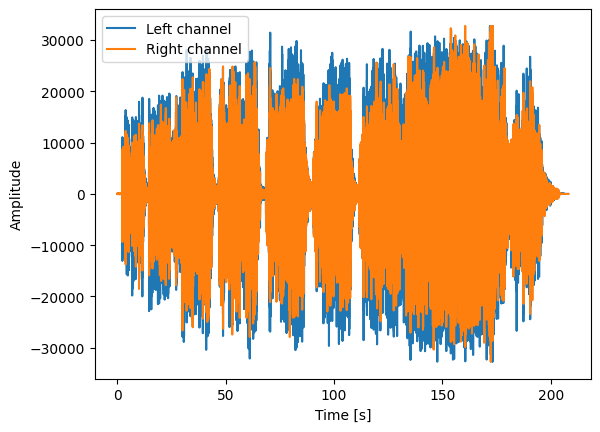

In [4]:
import matplotlib.pyplot as plt
import numpy as np

time = np.linspace(0., length, audio_signal.shape[0])
plt.plot(time, audio_signal[:, 0], label="Left channel")
plt.plot(time, audio_signal[:, 1], label="Right channel")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

In [5]:
from scipy.fft import fft, dct
from scipy.signal import hann
import scipy.signal

#nperseg
#noverlap
#sample 17
# Parameters for the spectrogram
#f, t, Sxx = scipy.signal.spectrogram(audio_signal[:, 0], fs = sample_rate)
data = audio_signal[:, 0]
window_length=1*1024
overlap_length=0
NFFT=5*1024
f, t, Sxx = scipy.signal.spectrogram(data,
                                   window='hann',
                                   nperseg=int(window_length),
                                   noverlap=int(overlap_length),
                                   nfft=int(NFFT),
                                   fs=sample_rate)

In [6]:
print(t.shape)
print(f.shape)
print(Sxx.shape)

print(t)
print(f)

(8960,)
(2561,)
(2561, 8960)
[1.16099773e-02 3.48299320e-02 5.80498866e-02 ... 2.07992744e+02
 2.08015964e+02 2.08039184e+02]
[0.00000000e+00 8.61328125e+00 1.72265625e+01 ... 2.20327734e+04
 2.20413867e+04 2.20500000e+04]


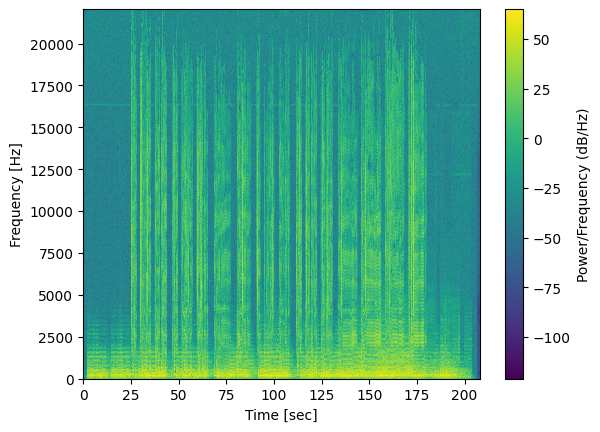

In [7]:
# Plot spectrogram
plt.pcolormesh(t, f, 10 * np.log10(Sxx))  # Use log scale for better visualization
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.colorbar(label='Power/Frequency (dB/Hz)')
plt.show()

In [8]:
from scipy.ndimage import maximum_filter

# Define the neighborhood size:
window_size = 400
neighborhood_size = (window_size, window_size)

# Apply the maximum filter to identify local maxima in the spectrogram.
local_maxima = maximum_filter(Sxx, size=neighborhood_size) == Sxx
print(local_maxima)

# Extract the coordinates of the local maxima
maxima_coordinates = np.where(local_maxima == True)
print(maxima_coordinates)


# map the extracted coordinate indices to time and frequency variables from the constellation map
t_constellationvalues = t[np.array(maxima_coordinates[1])]
f_constellationvalues = f[np.array(maxima_coordinates[0])]

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
(array([  20,   20,   20,   21,   21,   21,   21,   21,   22,   22,   23,
         23,   24,   25,   25,   26,   26,   28,   28,  269,  302,  533,
        545,  552,  569,  570,  571,  595,  668,  671,  678,  690,  709,
        715,  724,  730,  752,  782,  793,  794,  802,  849,  858,  948,
        981, 1052, 1053, 1066, 1083, 1117, 1129, 1206, 1270, 1320, 1323,
       1323, 1355, 1369, 1381, 1382, 1389, 1395, 1406, 1411, 1417, 1441,
       1458, 1462, 1467, 1496, 1537, 1604, 1654, 1821, 1897, 1899, 1899,
       1900, 1919, 1942, 1981, 2048, 2095, 2105, 2159, 2350, 2421, 2464,
       2519, 2559, 2559], dtype=int64), array([1032, 1632, 2608, 3028, 4474, 5161, 6604, 6960, 3273, 5499, 4196,
       6159, 8203, 1296, 7224,  807, 2

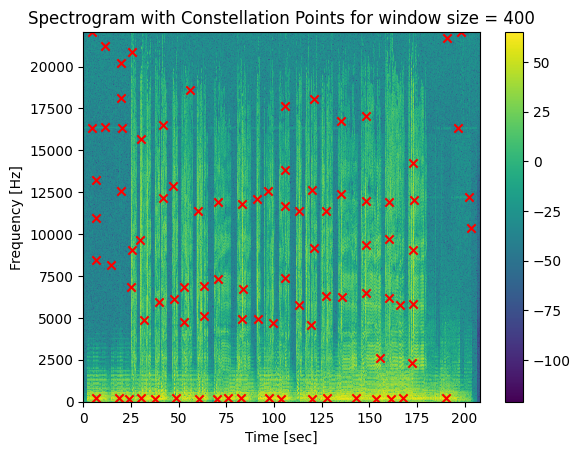

In [9]:
# Create the figure and axes
fig, ax = plt.subplots()
colormesh = ax.pcolormesh(t, f, 10 * np.log10(Sxx))  # Use log scale for better visualization
ax.scatter(t_constellationvalues, f_constellationvalues, color='red', marker='x')

# Set labels and title
ax.set_xlabel('Time [sec]')
ax.set_ylabel('Frequency [Hz]')
ax.set_title('Spectrogram with Constellation Points for window size = {}'.format(window_size))
cbar = fig.colorbar(colormesh)
plt.show()

In [10]:
# combinatorial hash generation
import hashlib

# target zone width in seconds
targetzone_width = 75

# target zone height in frequency
targetzone_height = 7500

constellation_points = list(zip(t_constellationvalues, f_constellationvalues))

anchor_points = list(zip(t_constellationvalues, f_constellationvalues))

# loop over every point in constellation as anchor point
for anchor_point in anchor_points:
    print("anchor point : ", anchor_point)
    t_anchor, f_anchor = anchor_point  # Unpack the point into individual variables
    targetzone_left = t_anchor - targetzone_width / 2.0
    targetzone_right = t_anchor + targetzone_width / 2.0

    targetzone_lowerlimit = f_anchor - targetzone_height / 2.0
    targetzone_upperlimit = f_anchor + targetzone_height / 2.0

    # loop over every point in the constellation in the target zone of the current anchor point 
    for constellation_point in constellation_points:
        t_constellation, f_constellation = constellation_point  # Unpack the point into individual variables

        # check if constellation point in the target zone of the current anchor point 
        if(targetzone_left <= t_constellation <= targetzone_right) and (targetzone_lowerlimit <= f_constellation <= targetzone_upperlimit) and (anchor_point != constellation_point):
            t1 = t_anchor
            f1 = f_anchor
            t2 = t_constellation
            f2 = f_constellation

            print("\t constellation point : ", constellation_point)
            delta_t = t2 - t1
            message = str(f1) + str(f2) + str(delta_t)
            sha256_hash = hashlib.sha256(message.encode()).hexdigest()
            print("\t SHA-256 Hash: ", sha256_hash, "  ,t1: " ,t1)

anchor point :  (23.974603174603175, 172.265625)
	 constellation point :  (37.90657596371882, 172.265625)
	 SHA-256 Hash:  e113edf8af4f8c331aae57d7c931a83d37e019ecd7fef3338ef7e8f5fc6982f5   ,t1:  23.974603174603175
	 constellation point :  (60.56925170068027, 172.265625)
	 SHA-256 Hash:  b5e5dea38a3f5f0e32959b0713632fb316f928eb378bf531937181f2533d39ff   ,t1:  23.974603174603175
	 constellation point :  (30.10467120181406, 215.33203125)
	 SHA-256 Hash:  42e663f255163e77ac315852bebc457b26005c7bf1c7b27f89bd102dd37292ff   ,t1:  23.974603174603175
	 constellation point :  (18.75011337868481, 223.9453125)
	 SHA-256 Hash:  2eccf915e35ad299aa7a2b905c80be8ef9daf74f4db2cf8724a22f46e0b57b91   ,t1:  23.974603174603175
	 constellation point :  (48.77351473922902, 223.9453125)
	 SHA-256 Hash:  ea1b3851582e2eff6773d6a0a6de30290ff179f2cb3308c2138236fe79a4423a   ,t1:  23.974603174603175
	 constellation point :  (6.884716553287982, 241.171875)
	 SHA-256 Hash:  4915c0170809fd048751077142bbf293a0351bfe6a3

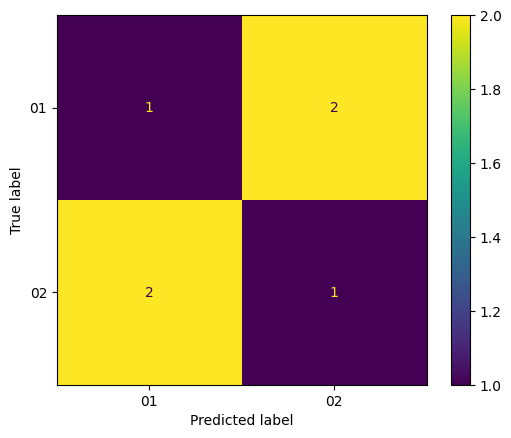

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

# Assuming you have your true labels and predicted labels
y_true = ["01", "02", "01", "02", "01", "02"]
y_pred = ["01", "02", "02", "01", "02", "01"]

# Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["01", "02"])
disp.plot()
plt.show()